In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# データの読み込み
data_folder = r"C:\Users\ryoya\MasterThesis\MT_Furuie\results\Miwa_LSTM\CrossVal_2\model"
excel_name = "\CrossVal_2_pred_2023_05_31_graph.xlsx"
excel_path = data_folder + excel_name

d = pd.read_excel(excel_path, header=0)

t = d.iloc[:, 1]
Q = d.iloc[:, 3]
Tur_obs = d.iloc[:, 4]
Tur_pred = d.iloc[:, 7]
Rain = d.iloc[:, 2]


図を保存しました: C:\Users\ryoya\MasterThesis\MT_Furuie\results\Miwa_LSTM\CrossVal_2\model\CrossVal_2_pred_2023_05_31_graph.png


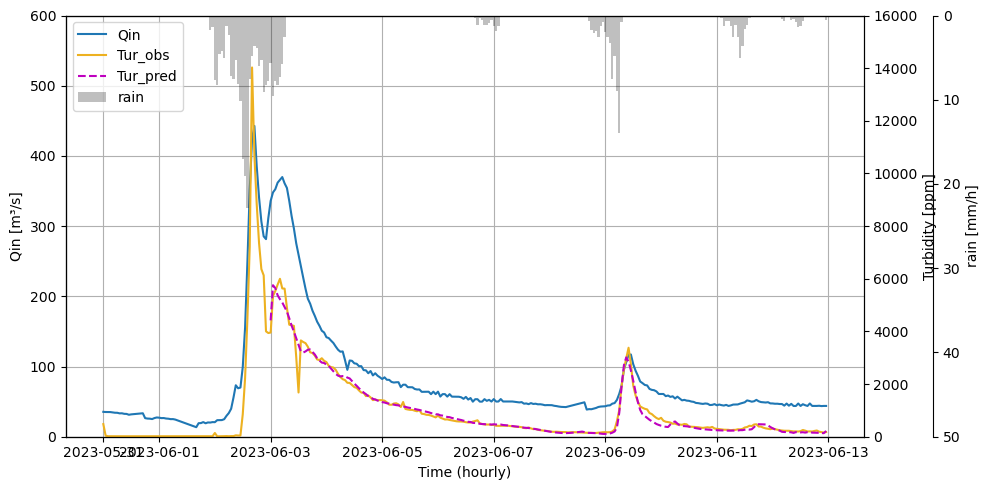

In [5]:
# グラフの描画・保存

fig, ax = plt.subplots(figsize=(10, 5))

# ---- 左：流量（内側）----
ax.plot(t, Q, label='Qin')
ax.set_ylabel('Qin [m³/s]')
ax.set_ylim(0, 600)

# ---- 右：濁度（実測・予測）----
ax_right = ax.twinx()
ax_right.plot(t, Tur_obs, color='#EDB120', label='Tur_obs')
ax_right.plot(t, Tur_pred, color='m', linestyle='--', label='Tur_pred')
ax_right.set_ylabel('Turbidity [ppm]')
ax_right.set_ylim(0, 16000)

# ==== 右軸（外側）：雨量 ====
ax_rain = ax.twinx()
ax_rain.bar(t, Rain, width=1/24, color='k', alpha=0.25, edgecolor='none', label='rain')
ax_rain.set_ylabel('rain [mm/h]')
ax_rain.set_ylim(0, 50)
ax_rain.invert_yaxis()  # 反転：上ほど多い雨量を表現

# --- 軸の位置を「右外側」にずらす（グラフ本体は動かさない） ---
ax_rain.spines['right'].set_position(('outward', 50))  # ← 外側へ50ptずらす
ax_rain.spines['right'].set_visible(True)
ax_rain.tick_params(axis='y', colors='k')
ax_rain.spines['right'].set_color('k')
ax_rain.yaxis.label.set_color('k')


# ---- 共有設定など ----
ax.set_xlabel('Time (hourly)')
ax.grid(True)

# 凡例（3軸の線・棒をまとめる）
handles, labels = [], []
for a in (ax, ax_right, ax_rain):
    h, l = a.get_legend_handles_labels()
    handles += h; labels += l
ax.legend(handles, labels, loc='upper left')

# グラフの保存
result_folder = r"C:\Users\ryoya\MasterThesis\MT_Furuie\results\Miwa_LSTM\CrossVal_2\model"
graph_name, _ = os.path.splitext(excel_name)
graph_path = result_folder + graph_name + ".png"

plt.savefig(graph_path, dpi=300, bbox_inches='tight')
print("図を保存しました:", graph_path)

fig.tight_layout()
plt.show()